In [44]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, precision_score, classification_report, roc_auc_score
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



In [45]:
raw_data_RIGHT = pd.read_csv(r'C:\Users\Anwari\Downloads\helo\dataset\RIGHT.csv')
raw_data_LEFT = pd.read_csv(r'C:\Users\Anwari\Downloads\helo\dataset\LEFT.csv')
raw_data_UP = pd.read_csv(r'C:\Users\Anwari\Downloads\helo\dataset\UP.csv')
raw_data_DOWN = pd.read_csv(r'C:\Users\Anwari\Downloads\helo\dataset\DOWN.csv')


In [46]:
raw_data_UP.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,20,21,22,23,24,25,26,27,28,29
0,0,0.000248,0.047404,-0.015414,-0.002540,-0.008496,-0.016469,-0.028687,-0.017898,-0.011372,...,-0.019127,-0.032841,-0.006237,-0.014011,0.025445,0.035141,0.011296,-0.003508,-0.025931,-0.000754
1,1,0.000687,0.046114,-0.016430,-0.002342,-0.006581,-0.017822,-0.027793,-0.016982,-0.010286,...,-0.017527,-0.033965,-0.009548,-0.015372,0.026154,0.033807,0.009588,-0.003225,-0.026502,-0.002211
2,2,0.001141,0.044731,-0.017446,-0.002164,-0.004654,-0.019175,-0.026903,-0.016000,-0.009133,...,-0.015980,-0.035117,-0.012831,-0.016730,0.026827,0.032438,0.007887,-0.002977,-0.027074,-0.003681
3,3,0.001606,0.043254,-0.018460,-0.002008,-0.002724,-0.020521,-0.026021,-0.014947,-0.007911,...,-0.014492,-0.036292,-0.016068,-0.018079,0.027458,0.031036,0.006199,-0.002768,-0.027646,-0.005161
4,4,0.002083,0.041681,-0.019466,-0.001877,-0.000795,-0.021855,-0.025152,-0.013820,-0.006621,...,-0.013070,-0.037484,-0.019242,-0.019411,0.028036,0.029606,0.004530,-0.002601,-0.028214,-0.006647


In [47]:
raw_data_DOWN.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,20,21,22,23,24,25,26,27,28,29
0,0,0.126787,-0.059156,0.083403,0.090140,0.114877,0.050987,0.028857,0.004028,0.169297,...,-0.012813,-0.005454,0.059254,0.010330,0.018552,-0.038891,0.021228,-0.039240,-0.047630,0.075032
1,1,0.124796,-0.059137,0.081373,0.091103,0.110954,0.051344,0.030621,0.004317,0.163263,...,-0.012042,-0.004425,0.067091,0.007670,0.020931,-0.039640,0.021545,-0.038119,-0.044595,0.074921
2,2,0.122742,-0.059131,0.079289,0.092044,0.107078,0.051620,0.032404,0.004578,0.157172,...,-0.011334,-0.003314,0.074898,0.005047,0.023165,-0.040459,0.021942,-0.037019,-0.041438,0.074833
3,3,0.120622,-0.059137,0.077160,0.092946,0.103265,0.051802,0.034196,0.004806,0.151045,...,-0.010702,-0.002119,0.082638,0.002471,0.025227,-0.041344,0.022416,-0.035948,-0.038160,0.074771
4,4,0.118434,-0.059157,0.074996,0.093793,0.099531,0.051881,0.035988,0.004995,0.144906,...,-0.010158,-0.000837,0.090273,-0.000050,0.027096,-0.042294,0.022963,-0.034910,-0.034764,0.074741


In [48]:
up_down_data = pd.concat([raw_data_UP.iloc[:, 1:], raw_data_DOWN.iloc[:, 1:]], axis=1)
print(up_down_data.shape)
up_down_data.head()

(1000, 60)


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.000248,0.047404,-0.015414,-0.002540,-0.008496,-0.016469,-0.028687,-0.017898,-0.011372,-0.032876,...,-0.012813,-0.005454,0.059254,0.010330,0.018552,-0.038891,0.021228,-0.039240,-0.047630,0.075032
1,0.000687,0.046114,-0.016430,-0.002342,-0.006581,-0.017822,-0.027793,-0.016982,-0.010286,-0.033555,...,-0.012042,-0.004425,0.067091,0.007670,0.020931,-0.039640,0.021545,-0.038119,-0.044595,0.074921
2,0.001141,0.044731,-0.017446,-0.002164,-0.004654,-0.019175,-0.026903,-0.016000,-0.009133,-0.034247,...,-0.011334,-0.003314,0.074898,0.005047,0.023165,-0.040459,0.021942,-0.037019,-0.041438,0.074833
3,0.001606,0.043254,-0.018460,-0.002008,-0.002724,-0.020521,-0.026021,-0.014947,-0.007911,-0.034947,...,-0.010702,-0.002119,0.082638,0.002471,0.025227,-0.041344,0.022416,-0.035948,-0.038160,0.074771
4,0.002083,0.041681,-0.019466,-0.001877,-0.000795,-0.021855,-0.025152,-0.013820,-0.006621,-0.035644,...,-0.010158,-0.000837,0.090273,-0.000050,0.027096,-0.042294,0.022963,-0.034910,-0.034764,0.074741


In [49]:
y = np.append(np.ones(30), np.zeros(30))
print(y.shape)

(60,)


In [50]:
up_down_data.isnull().sum().sum()

0

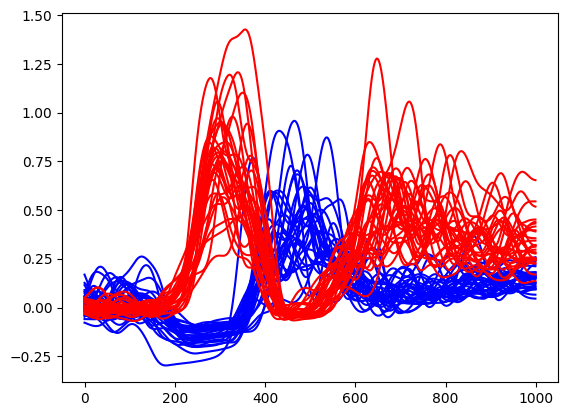

In [51]:
plt.plot(up_down_data.iloc[:, y==0], 'b')
plt.plot(up_down_data.iloc[:, y==1], 'r');



In [65]:
x_train, x_test, y_train, y_test = train_test_split(up_down_data[200:800].T, y, test_size=0.3, shuffle=True, random_state=42, stratify=y)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
print(x_train.shape)

(42, 600)


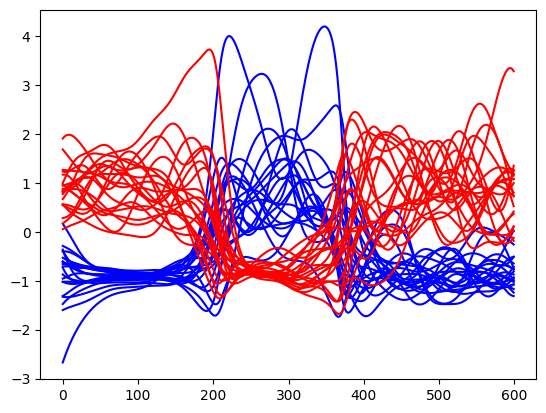

In [66]:
plt.plot(x_train[y_train==0].T, 'b')
plt.plot(x_train[y_train==1].T, 'r');

In [109]:
def train_test_metrics(model, X_train, X_test, y_train, y_test):
    
    print(f'{model} results')
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print('ROC AUC:', roc_auc_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred))
    print('Recall:', recall_score(y_test, y_pred))
    print('F1:', f1_score(y_test, y_pred))
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    conf_mat_knn = confusion_matrix(y_test, y_pred)
    display = ConfusionMatrixDisplay(conf_mat_knn)
    display.plot()
    
    if isinstance(model, DecisionTreeClassifier):
        plt.figure(figsize=(20, 5))
        plot_tree(model, proportion=True, filled=True, rounded=True)
        plt.title('Decision Tree Visualization')
        plt.show()
    
    
model_1 = KNeighborsClassifier()
model_2 = SVC()
model_3 = DecisionTreeClassifier()
model_4 = LogisticRegression()
    
# Suppress specific warnings
warnings.filterwarnings("ignore", message="Could not find the number of physical cores")

KNeighborsClassifier() results
ROC AUC: 0.8888888888888888
Precision: 0.8888888888888888
Recall: 0.8888888888888888
F1: 0.8888888888888888
Accuracy: 0.8888888888888888


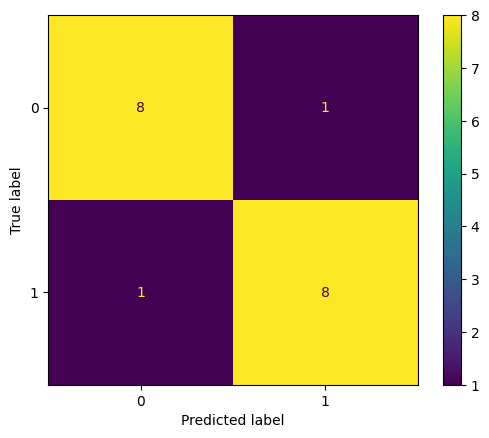

In [110]:
train_test_metrics(model= model_1, X_train=x_train,X_test= x_test, y_train = y_train, y_test = y_test)

SVC() results
ROC AUC: 0.8888888888888888
Precision: 0.8888888888888888
Recall: 0.8888888888888888
F1: 0.8888888888888888
Accuracy: 0.8888888888888888


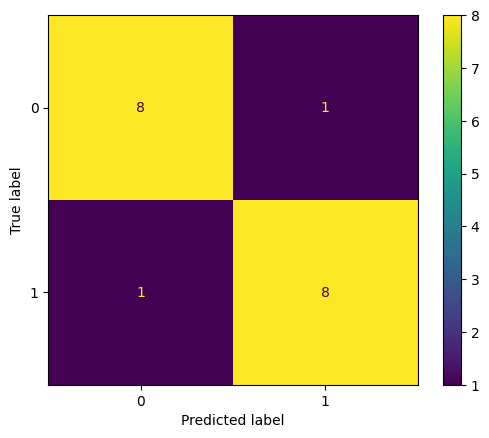

In [111]:
train_test_metrics(model_2, x_train, x_test, y_train,y_test)

DecisionTreeClassifier() results
ROC AUC: 0.7777777777777777
Precision: 0.7777777777777778
Recall: 0.7777777777777778
F1: 0.7777777777777778
Accuracy: 0.7777777777777778


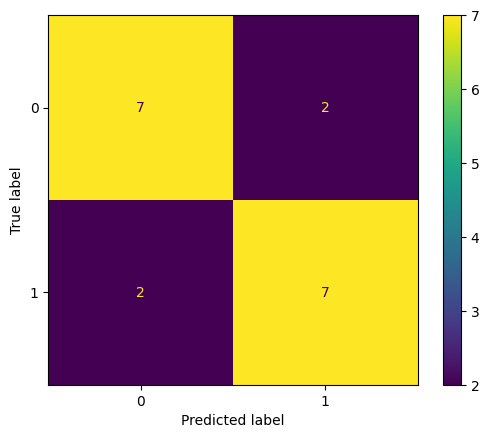

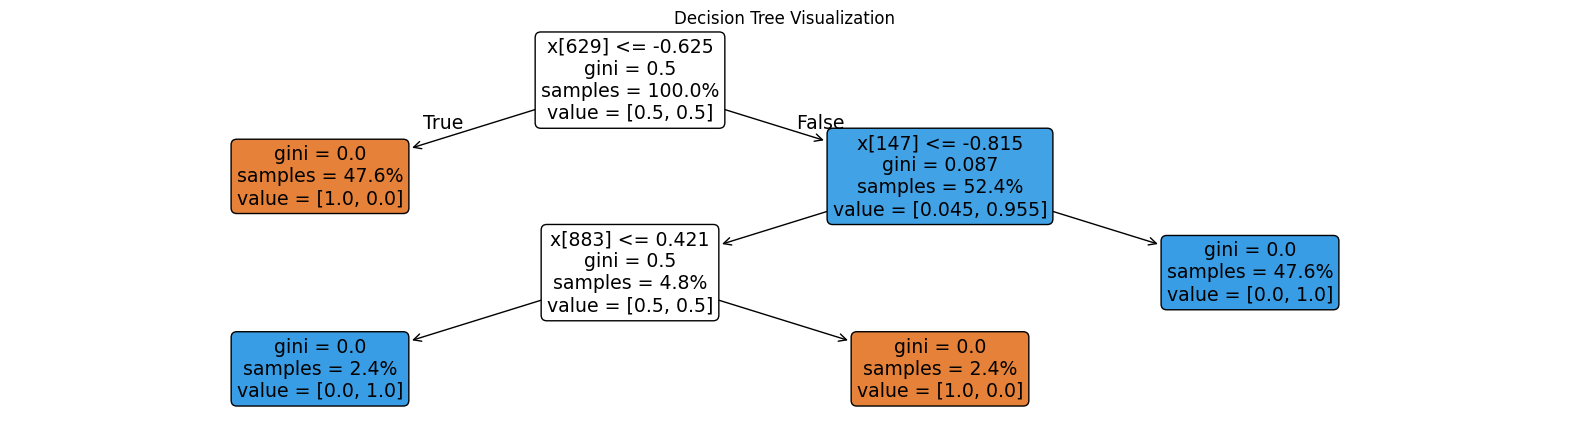

In [112]:
train_test_metrics(model_3, x_train, x_test, y_train,y_test)

LogisticRegression() results
ROC AUC: 0.7777777777777777
Precision: 0.7777777777777778
Recall: 0.7777777777777778
F1: 0.7777777777777778
Accuracy: 0.7777777777777778


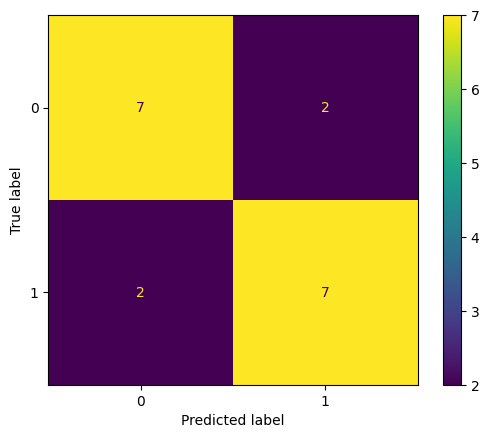

In [113]:
train_test_metrics(model_4, x_train, x_test, y_train,y_test)

In [114]:
print(raw_data_LEFT.shape)

(1000, 31)


In [115]:
left_right_data = pd.concat([raw_data_LEFT.iloc[:, 1:], raw_data_RIGHT.iloc[:, 1:]], axis=1)
print(left_right_data.shape)

(1000, 60)


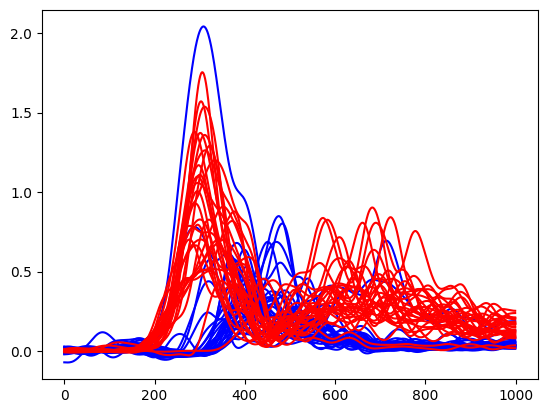

In [116]:
# drop_po = ((y==0) & (np.max(np.array(left_right_data), axis=0) <= 2)) | (y==1)
# left_right_data_drop = left_right_data.iloc[:, drop_po]
# y_drop = y[drop_po]
plt.plot(left_right_data.iloc[:, y==0], 'b')
plt.plot(left_right_data.iloc[:, y==1], 'r');

In [117]:
x_train, x_test, y_train, y_test = train_test_split(left_right_data.T, y, test_size=0.3, shuffle=True, random_state=42, stratify=y)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
print(x_train.shape)

(42, 1000)


KNeighborsClassifier() results
ROC AUC: 0.8888888888888888
Precision: 0.8888888888888888
Recall: 0.8888888888888888
F1: 0.8888888888888888
Accuracy: 0.8888888888888888


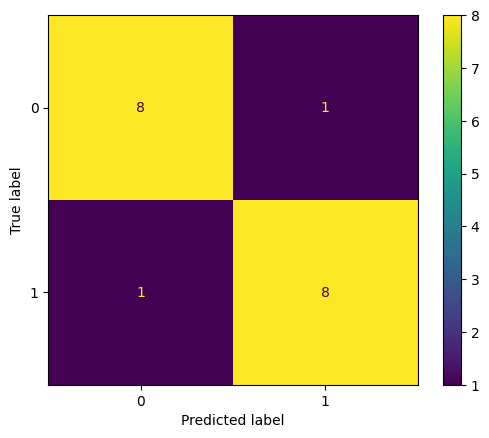

In [118]:
train_test_metrics(model_1, x_train, x_test, y_train, y_test)

SVC() results
ROC AUC: 0.8888888888888888
Precision: 0.8888888888888888
Recall: 0.8888888888888888
F1: 0.8888888888888888
Accuracy: 0.8888888888888888


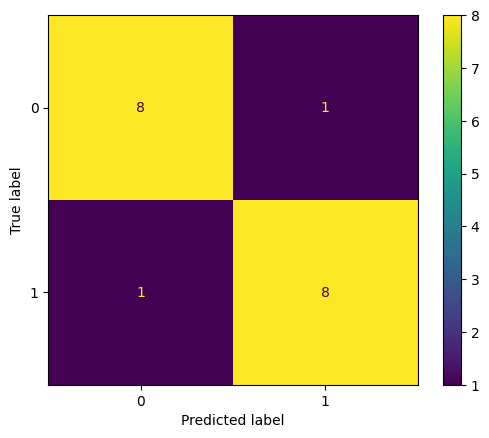

In [119]:
train_test_metrics(model_2, x_train, x_test, y_train, y_test)

DecisionTreeClassifier() results
ROC AUC: 0.7777777777777777
Precision: 0.7777777777777778
Recall: 0.7777777777777778
F1: 0.7777777777777778
Accuracy: 0.7777777777777778


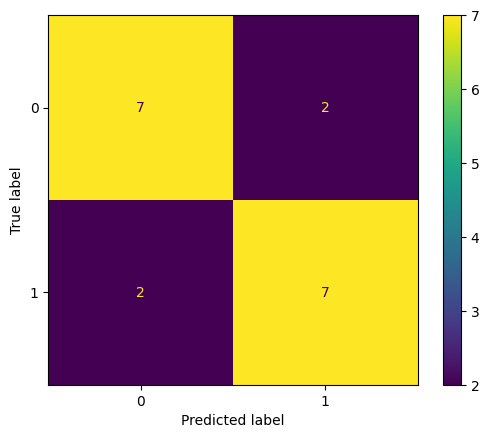

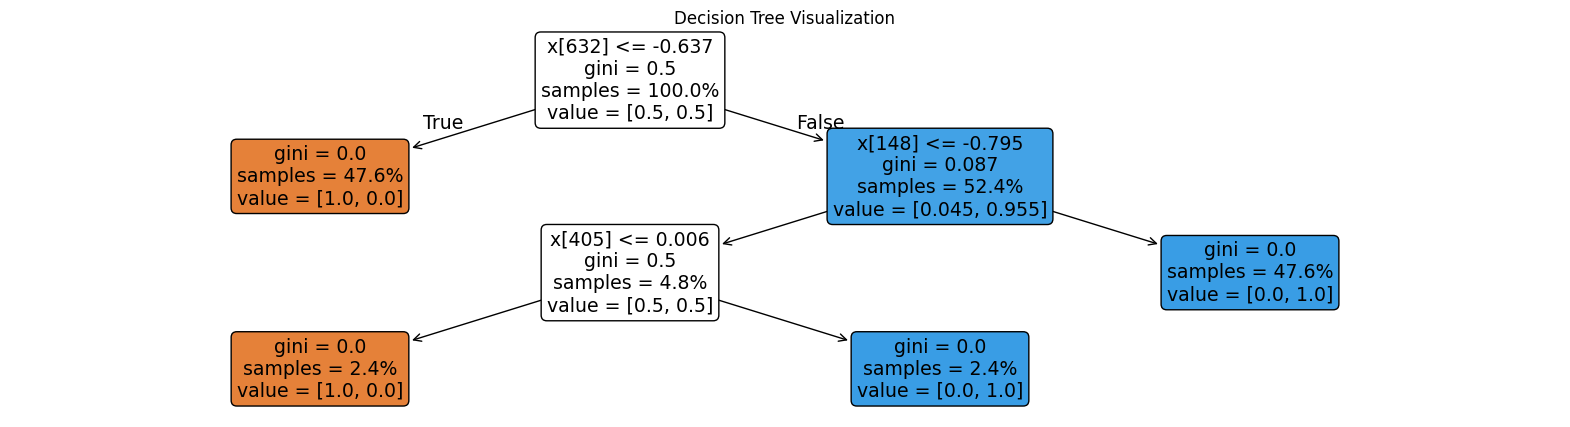

In [120]:
train_test_metrics(model_3, x_train, x_test, y_train, y_test)

LogisticRegression() results
ROC AUC: 0.7777777777777777
Precision: 0.7777777777777778
Recall: 0.7777777777777778
F1: 0.7777777777777778
Accuracy: 0.7777777777777778


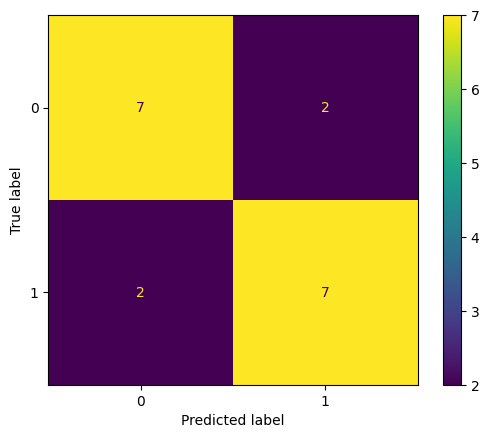

In [121]:
train_test_metrics(model_4, x_train, x_test, y_train, y_test)